In [1]:
# 📊 Load & Explore the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/california_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


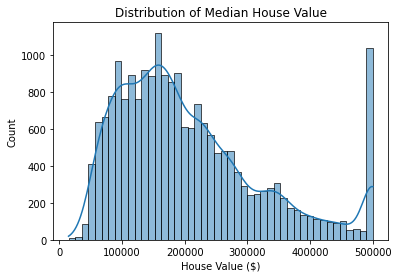

In [2]:
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('House Value ($)')
plt.show()


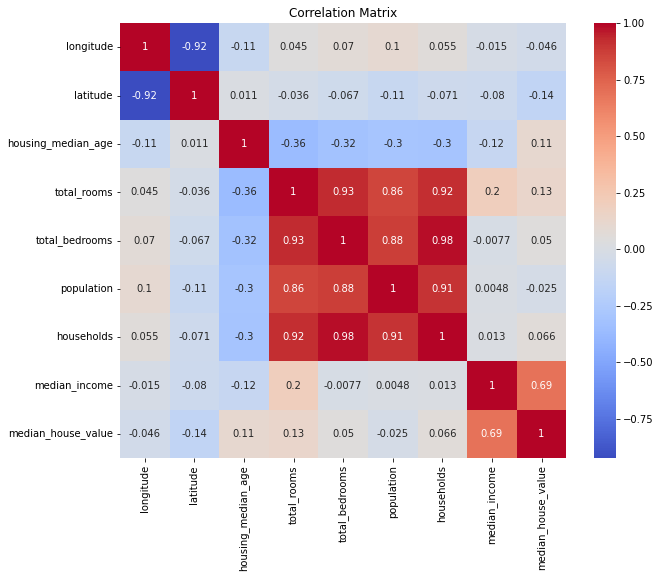

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [4]:
# 🛠️ Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_house'] = df['population'] / df['households']

# Confirm new features
df[['rooms_per_household', 'bedrooms_per_room', 'population_per_house']].describe()


,rooms_per_household,bedrooms_per_room,population_per_house
count,20640.000000,20433.000000,20640.000000
mean,5.429000,0.213039,3.070655
std,2.474173,0.057983,10.386050
min,0.846154,0.100000,0.692308
25%,4.440716,0.175427,2.429741
50%,5.229129,0.203162,2.818116
75%,6.052381,0.239821,3.282261
max,141.909091,1.000000,1243.333333


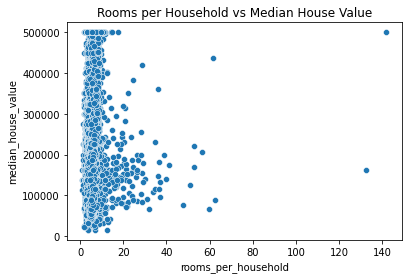

In [5]:
sns.scatterplot(x='rooms_per_household', y='median_house_value', data=df)
plt.title('Rooms per Household vs Median House Value')
plt.show()


In [6]:
# Filter out extreme outliers in 'rooms_per_household'
df = df[df['rooms_per_household'] < 50]


In [7]:
features = [
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_house'
]


In [15]:
# Fill missing values with median
X['total_bedrooms'].fillna(X['total_bedrooms'].median(), inplace=True)
X['bedrooms_per_room'].fillna(X['bedrooms_per_room'].median(), inplace=True)


c:\users\het patel\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\het patel\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(f"XGBoost RMSE: {mean_squared_error(y_test, y_pred_xgb, squared=False):.2f}")
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb):.4f}")


XGBoost RMSE: 62502.37
XGBoost R² Score: 0.7045


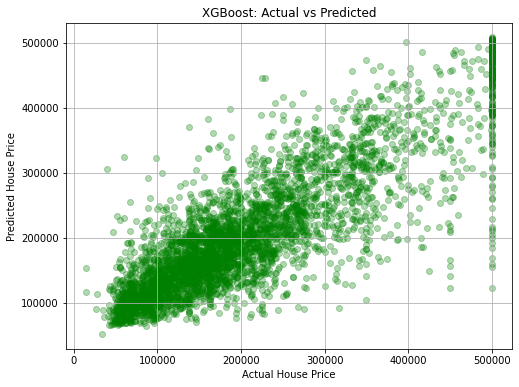

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='green')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


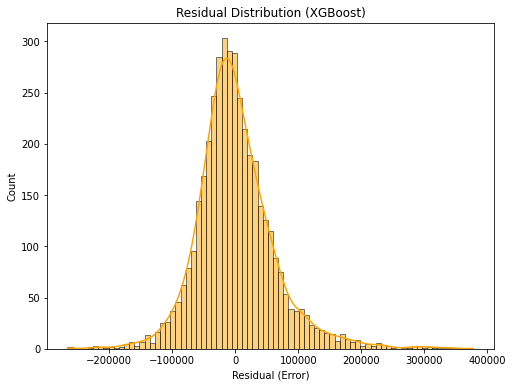

In [18]:
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residual (Error)")
plt.show()


In [20]:
from xgboost import XGBRegressor, plot_importance

# Rename model object to avoid conflict with 'xgb' module
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)


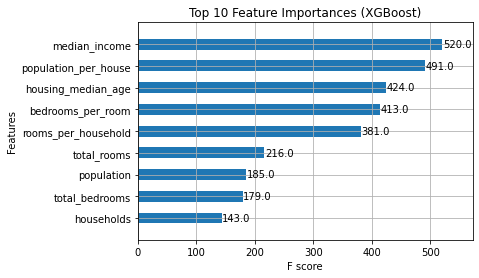

In [21]:
plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


In [22]:
importance = xgb_model.feature_importances_
for name, score in zip(X.columns, importance):
    print(f"{name}: {score:.4f}")


housing_median_age: 0.0745
total_rooms: 0.0238
total_bedrooms: 0.0322
population: 0.0158
households: 0.0271
median_income: 0.6006
rooms_per_household: 0.0390
bedrooms_per_room: 0.0412
population_per_house: 0.1459
